# Номер 1

In [77]:
import numpy as np
import math
from matplotlib import pyplot as plt
from random import randint

In [135]:
N, θ = 100, 100
inputs = [randint(0, θ) for i in range(N)]

In [137]:
def estimation1(inputs):
    return 2 * sum(inputs) / len(inputs)

def estimation2(inputs):
    return min(inputs) * (len(inputs) + 1)

def estimation3(inputs):
    return max(inputs) * (len(inputs) + 1) / len(inputs)

def estimation4(inputs):
    return max(inputs) + min(inputs)

def estimation5(inputs):
    return inputs[0] + sum(inputs[1:]) / (len(inputs) - 1) if len(inputs) > 1 else inputs[0]

In [138]:
def outputs(inputs, function, θ):
    return [abs(function(inputs[:i]) - θ) for i in range(1, len(inputs) + 1)]

In [139]:
estimations = [estimation1, estimation2, estimation3, estimation4, estimation5]
x, y = [list(range(1, len(inputs) + 1))] * 5, [outputs(inputs, estimations[i], θ) for i in range(5)]

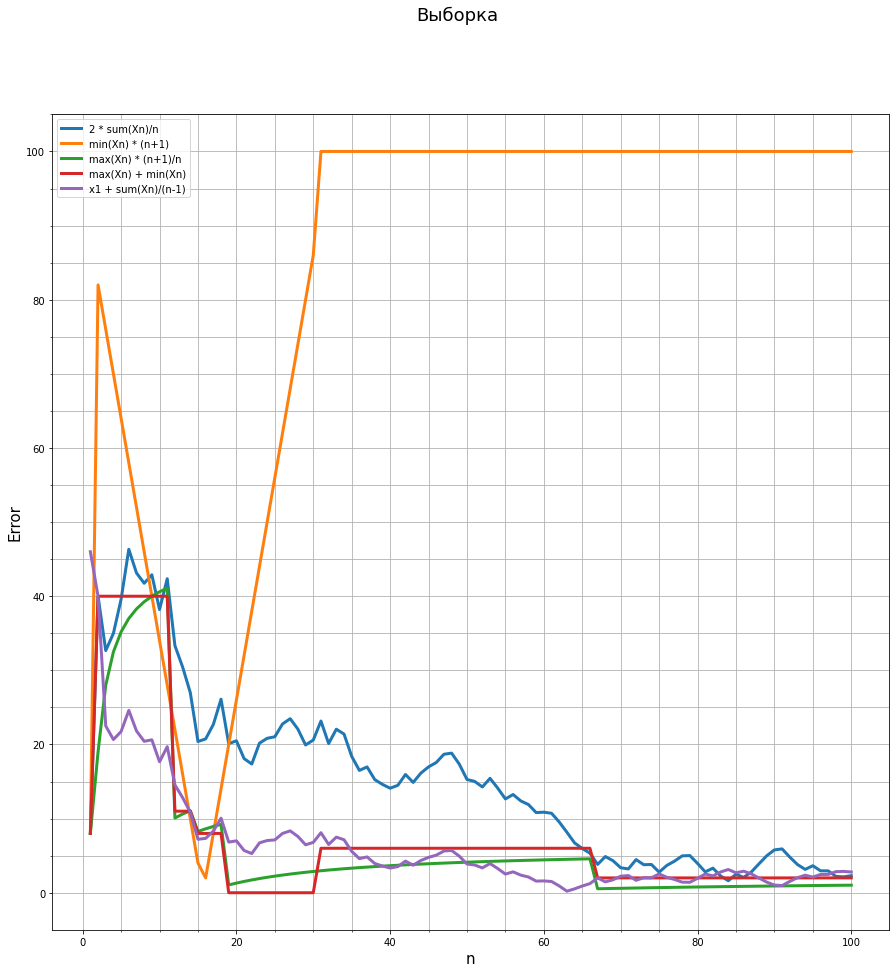

In [140]:
fig, ax = plt.subplots(figsize = (15, 15))
fig.suptitle("Выборка", size = 18)
labels = ["2 * sum(Xn)/n", "min(Xn) * (n+1)", "max(Xn) * (n+1)/n", "max(Xn) + min(Xn)", "x1 + sum(Xn)/(n-1)"]

for i in range(len(x)):
    plt.plot(x[i], y[i], linewidth = 3, label = labels[i])
    

ax.set_xlabel('n', fontsize = 15)
ax.set_ylabel('Error', fontsize = 15)

ax.grid(True)
ax.minorticks_on()
ax.grid(which = 'minor')

plt.legend(loc = 0)
plt.show()

# Номер 2

In [235]:
import numpy as np
from matplotlib import pyplot as plt
import statistics
from scipy.stats import moment

In [249]:
x_selected = sorted(list(map(lambda x : np.log(1 / (1 - x)), np.random.sample(25))))
print('Выборка: ', x_selected)

Выборка:  [0.017730811536663584, 0.0572147267696765, 0.1333836494989835, 0.19252921041186052, 0.24643088387241416, 0.2743802346464067, 0.32229417728737064, 0.34500768629528583, 0.35938781348353405, 0.3965426894501307, 0.4075357556985196, 0.42060295906588085, 0.528683323647316, 0.6494649178519529, 0.797550244925417, 0.8736357685374033, 1.3976091081400381, 1.432346622024543, 1.911377224653148, 2.0073433497220576, 2.9423717145588792, 3.2089432495429375, 3.237577691362232, 3.3172064631211016, 4.161033839829228]


![jupyter](https://raw.githubusercontent.com/barly13/MAT_STAT/main/images/photo_2022-10-17%2021.17.03.jpeg)

# Пункт а)

In [250]:
print('Мода: ', statistics.multimode(x_selected))

Мода:  [0.017730811536663584, 0.0572147267696765, 0.1333836494989835, 0.19252921041186052, 0.24643088387241416, 0.2743802346464067, 0.32229417728737064, 0.34500768629528583, 0.35938781348353405, 0.3965426894501307, 0.4075357556985196, 0.42060295906588085, 0.528683323647316, 0.6494649178519529, 0.797550244925417, 0.8736357685374033, 1.3976091081400381, 1.432346622024543, 1.911377224653148, 2.0073433497220576, 2.9423717145588792, 3.2089432495429375, 3.237577691362232, 3.3172064631211016, 4.161033839829228]


In [251]:
print('Медиана: ' , statistics.median(x_selected))

Медиана:  0.528683323647316


In [252]:
print('Размах', x_selected[-1] - x_selected[0])

Размах 4.143303028292564


In [253]:
print('Коэффициент асимметрии', moment(x_selected, 3) / moment(x_selected, 2)**1.5)

Коэффициент асимметрии 1.0655387158758758


# Пункт b)

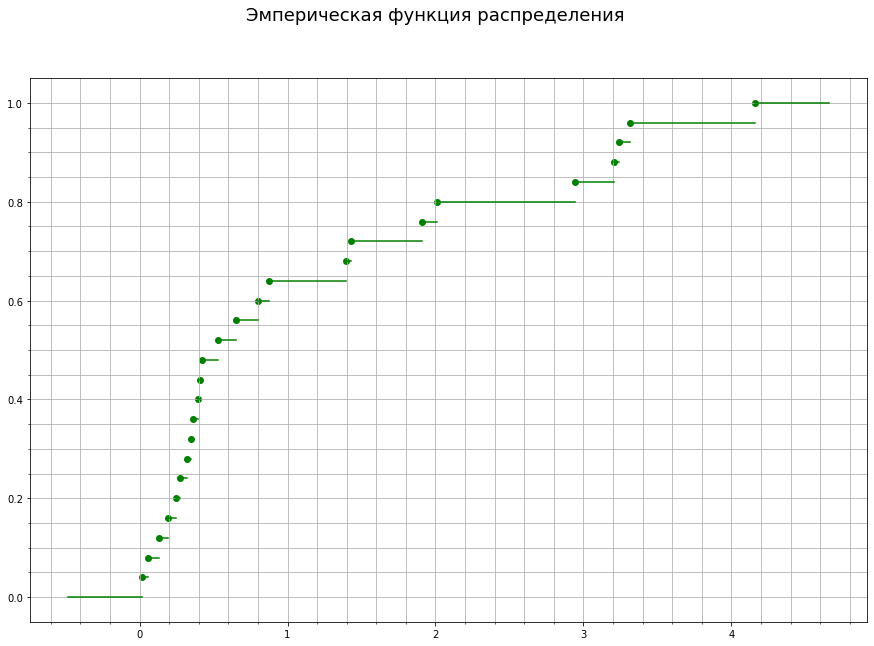

In [254]:
fig, ax = plt.subplots(figsize = (15, 10))
fig.suptitle("Эмперическая функция распределения", size = 18)

plt.plot([x_selected[0] - 0.5, x_selected[0]], [0,0], color = 'green')

for i in range(len(x_selected) - 1):
    plt.plot(x_selected[i:i+2], [(i + 1) / len(x_selected)] * 2, color = 'green')
    
plt.plot([x_selected[-1], x_selected[-1] + 0.5], [1,1], color = 'green')
plt.scatter(x_selected, [i / len(x_selected) for i in range(1, 26)], color = 'green', marker = '.', linewidths = 4)

ax.grid(True)
ax.minorticks_on()
ax.grid(which='minor')

In [255]:
x_selected_normir = list(np.histogram(x_selected))

x_selected_normir[0] = x_selected_normir[0] / len(x_selected)
x_selected_normir[0] = [x_selected_normir[0][i] / (x_selected_normir[1][i+1] - x_selected_normir[1][i]) for i in range(len(x_selected_normir[0]))]

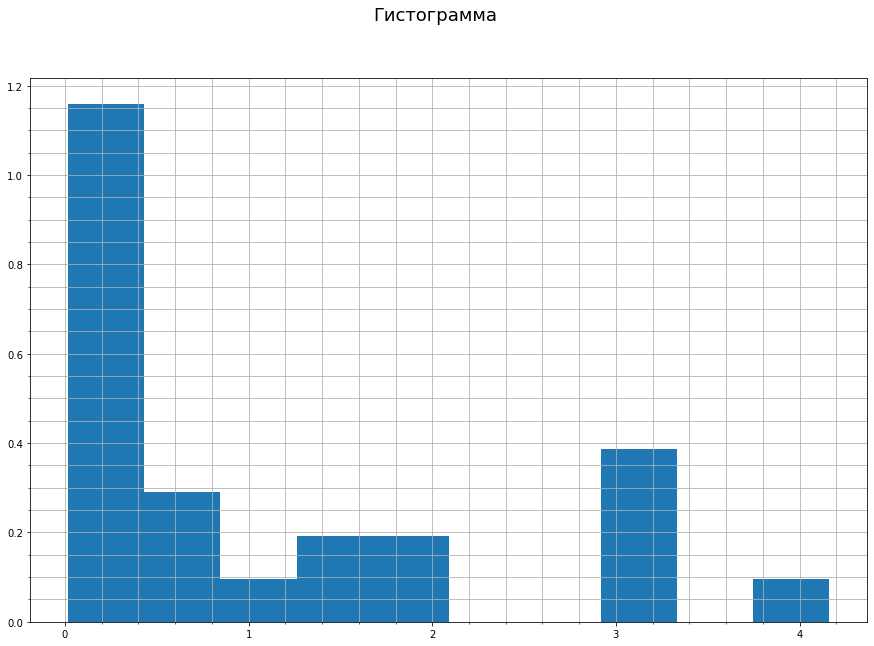

In [256]:
fig, ax = plt.subplots(figsize = (15, 10))

fig.suptitle("Гистограмма", size = 18)

plt.hist(x_selected_normir[1][:-1], x_selected_normir[1], weights=x_selected_normir[0])

ax.grid(True)
ax.minorticks_on()
ax.grid(which='minor')

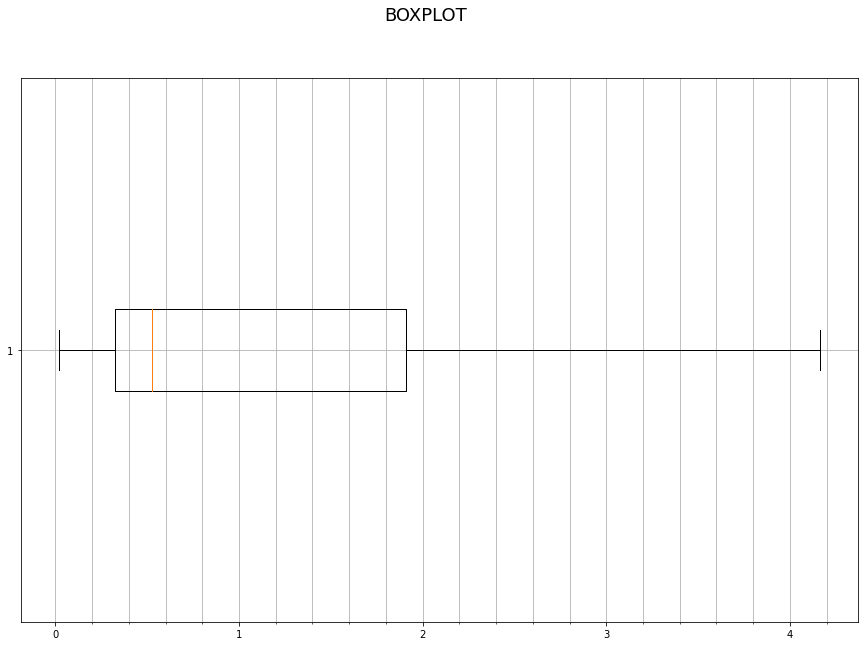

In [257]:
fig, ax = plt.subplots(figsize = (15, 10))

fig.suptitle("BOXPLOT", size = 18)

plt.boxplot(x_selected, vert = False)

ax.grid(True)
ax.minorticks_on()
ax.grid(which='minor')

# Пункт c)

In [268]:
S = np.sqrt((25 / 24) * moment(x_selected, 2))
h = 2.344 * (S / (25**(1/5)))

In [269]:
def q(y):
    return 0.75 * (1 - y**2)

def nuclear_assessment(z):
    return (1 / (25 * h)) * sum([q((z - i) / h) if q((z - i) / h) > 0 else 0 for i in x_selected])

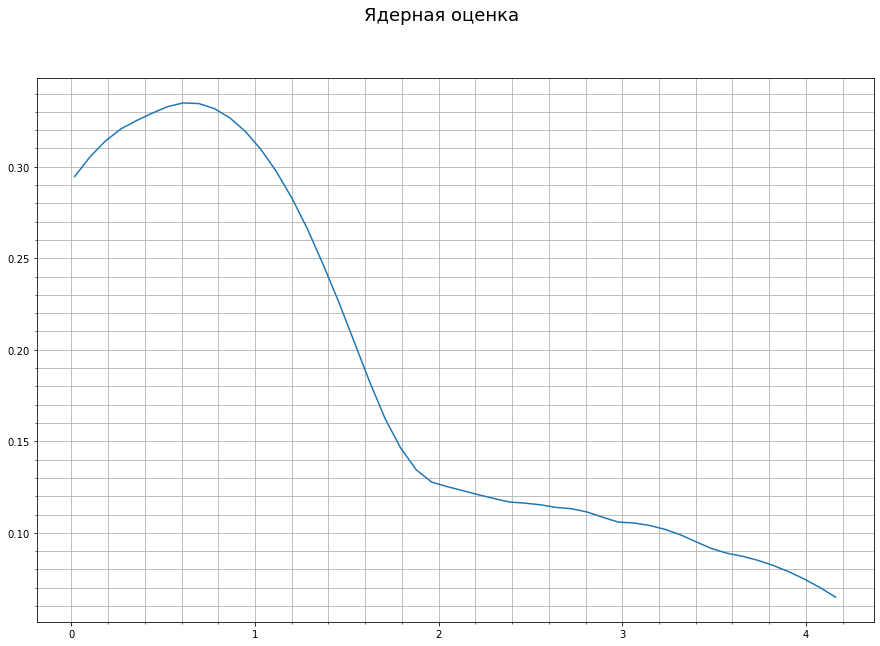

In [270]:
fig, ax = plt.subplots(figsize = (15, 10))

fig.suptitle("Ядерная оценка", size = 18)

y_nuclear = list(map(nuclear_assessment, np.linspace(x_selected[0], x_selected[-1], 50)))

plt.plot(np.linspace(x_selected[0], x_selected[-1], 50), y_nuclear)

ax.grid(True)
ax.minorticks_on()
ax.grid(which='minor')

# Пункт d)

In [271]:
def gaus_distribution(x):
    return 1 / np.sqrt(2 * np.pi * moment(x_selected, 2) / 25) * np.exp(-0.5 * (x - statistics.mean(x_selected))**2 / moment(x_selected, 2) * 25)

In [272]:
bootstrap = [np.mean(np.random.choice(x_selected, len(x_selected))) for i in range(1000)]

x_selected_normir = list(np.histogram(bootstrap))

x_selected_normir[0] = x_selected_normir[0] / len(bootstrap)
x_selected_normir[0] = [x_selected_normir[0][i] / (x_selected_normir[1][i+1] - x_selected_normir[1][i]) for i in range(len(x_selected_normir[0]))]

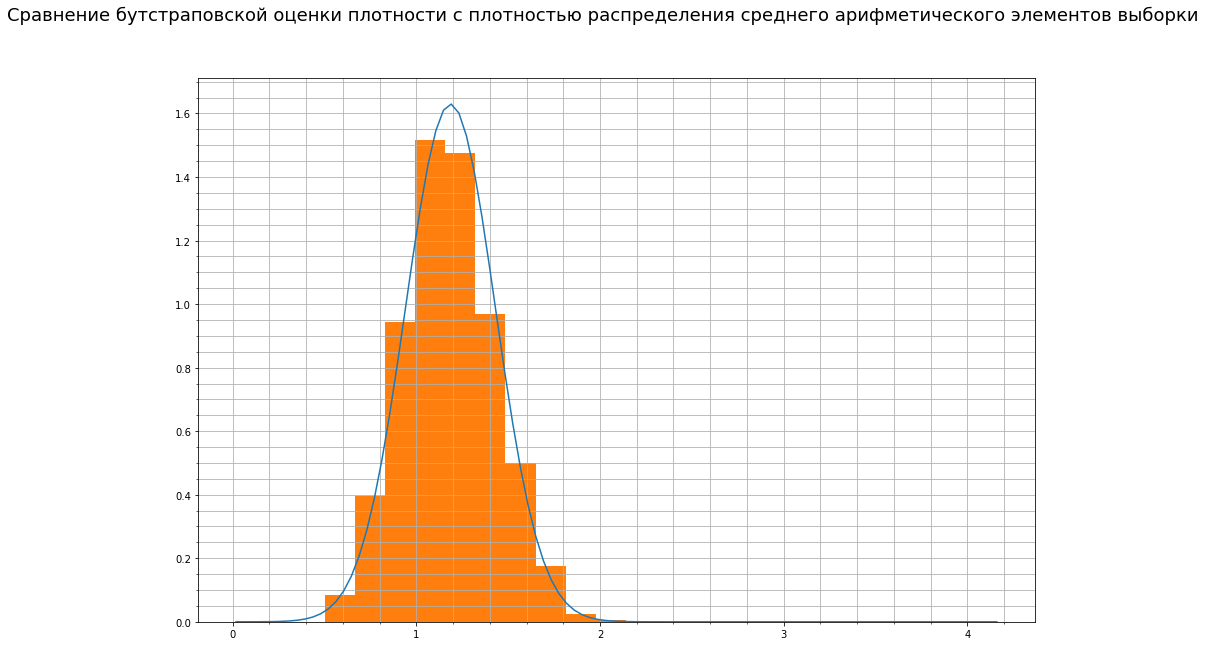

In [273]:
fig, ax = plt.subplots(figsize = (15, 10))

fig.suptitle("Сравнение бутстраповской оценки плотности с плотностью распределения среднего арифметического элементов выборки", size = 18)

gaus_dist = list(map(gaus_distribution, np.linspace(x_selected[0], x_selected[-1], 100)))

plt.plot(np.linspace(x_selected[0], x_selected[-1], 100), gaus_dist)
plt.hist(x_selected_normir[1][:-1], x_selected_normir[1], weights=x_selected_normir[0])

ax.grid(True)
ax.minorticks_on()
ax.grid(which='minor')

# Пункт e)

In [274]:
def find_coefficient(data):
    return moment(data, 3) / (moment(data, 2)**1.5)

In [275]:
bootstrap = [find_coefficient(np.random.choice(x_selected, len(x_selected))) for i in range(1000)]

x_selected_normir = list(np.histogram(bootstrap))

x_selected_normir[0] = x_selected_normir[0] / len(bootstrap)
x_selected_normir[0] = [x_selected_normir[0][i] / (x_selected_normir[1][i+1] - x_selected_normir[1][i]) for i in range(len(x_selected_normir[0]))]

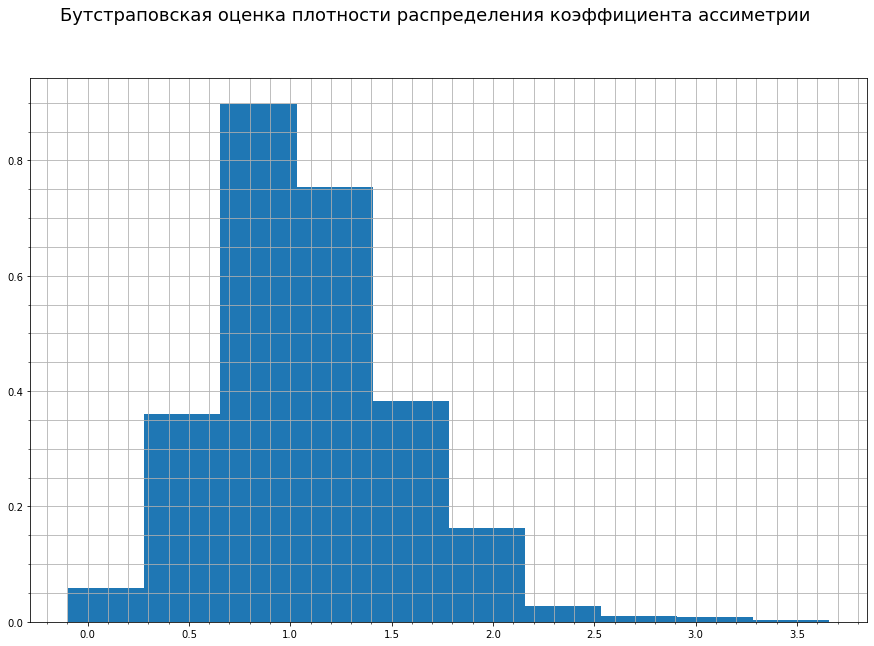

In [276]:
fig, ax = plt.subplots(figsize = (15, 10))

fig.suptitle("Бутстраповская оценка плотности распределения коэффициента ассиметрии", size = 18)

plt.hist(x_selected_normir[1][:-1], x_selected_normir[1], weights=x_selected_normir[0])

ax.grid(True)
ax.minorticks_on()
ax.grid(which='minor')

# Пункт f)

![jupyter](https://raw.githubusercontent.com/barly13/MAT_STAT/main/images/photo_2022-10-17%2021.17.29.jpeg)